# Task 1: Data Loading and Preprocessing

### 1. Loading the dataset from the given CSV file into a Pandas Data Frame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1: Loading the data into pandas data frame
df = pd.read_csv("../data/Dataset.csv")
df.head()

,Sno,job,education,gender,English speaker
0,1,manage,15,male,no
1,2,admin,16,male,no
2,3,admin,12,female,no
3,4,admin,8,female,no
4,5,admin,15,male,no


###  2. Basic data preprocessing steps, including handling missing values and removing duplicate rows.

In [2]:
#Dropping the Sno column as it is insignificant for our analysis
df.drop(['Sno'], axis=1, inplace=True)

In [3]:
#check dataset for the number of rows and columns
df.shape

(474, 4)

In [4]:
#unique values in each column
df['job'].unique()
df['education'].unique()
df['gender'].unique()
df['English speaker'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
#identifying categorical and numerical columns inside the dataset
catagorical_cols = df.columns[(df.dtypes == "object").tolist()].tolist()
numerical_cols = df.columns[(df.dtypes != 'object').tolist()].tolist()

catagorical_cols
numerical_cols

['education']

In [6]:
#identifying the total missing values
missing_values = df.isnull().sum()
missing_values

job                0
education          0
gender             0
English speaker    0
dtype: int64

In [7]:
#Handling missing values by replacing them with mode value of that column
df['job'].fillna(df['job'].mode()[0], inplace = True)
df['education'].fillna(df['education'].mode()[0], inplace = True)
df['English speaker'].fillna(df['English speaker'].mode()[0], inplace = True)



In [8]:
#checking for duplicate rows
df.duplicated().sum()

#Removing duplicate rows
df.drop_duplicates(inplace = True)

### 3. Display the first few rows of the cleaned dataset.

In [9]:
#Displaying the first 10 rows of the cleaned dataset
df.head(10)

,job,education,gender,English speaker
0,manage,15,male,no
1,admin,16,male,no
2,admin,12,female,no
3,admin,8,female,no
4,admin,15,male,no
8,admin,15,female,no
10,admin,16,female,no
11,admin,8,male,yes
12,admin,15,male,yes
13,admin,15,female,yes


# Task 2: Exploratory Data Analysis

### 1. Visualizing data to show distributions  of job roles, education levels, gender, and English-speaking status.

In [10]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 445
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job              40 non-null     object
 1   education        40 non-null     int64 
 2   gender           40 non-null     object
 3   English speaker  40 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [11]:
#Checking the tendencies of data
df.describe(include = 'all')

,job,education,gender,English speaker
count,40,40.000000,40,40
unique,3,NaN,2,2
top,admin,NaN,male,no
freq,23,NaN,30,22
mean,NaN,14.550000,NaN,NaN
std,NaN,3.615848,NaN,NaN
min,NaN,8.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN
50%,NaN,15.000000,NaN,NaN
75%,NaN,17.000000,NaN,NaN


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

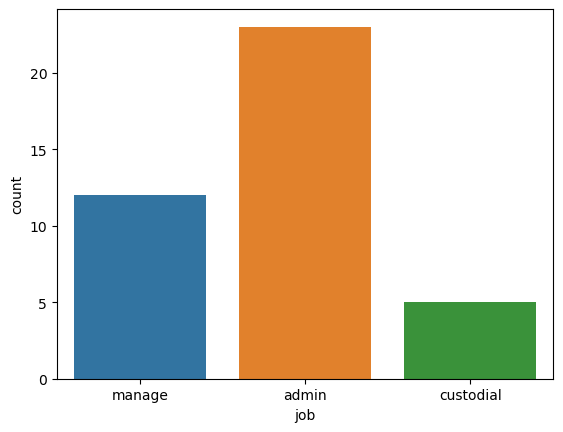

In [12]:
#pie chart to Compare the job role distribution
sns.countplot(df['job'])


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

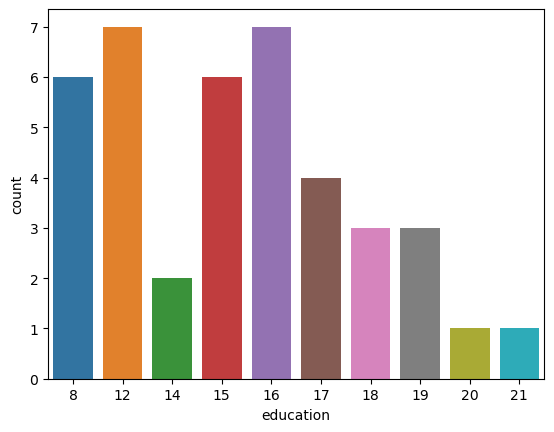

In [13]:
#Displaing the count for each education level
sns.countplot(df['education'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

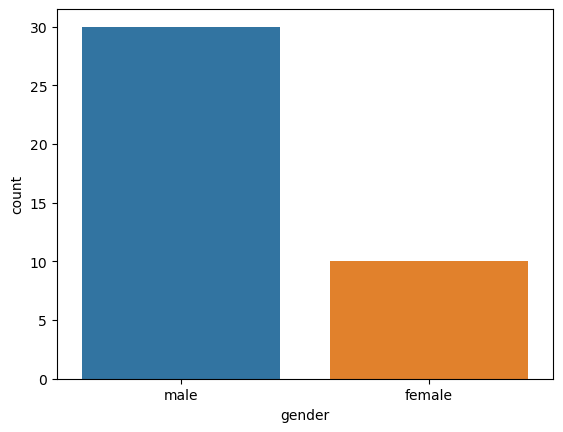

In [14]:
#Gender distribution of the dataset
sns.countplot(df['gender'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='English speaker', ylabel='count'>

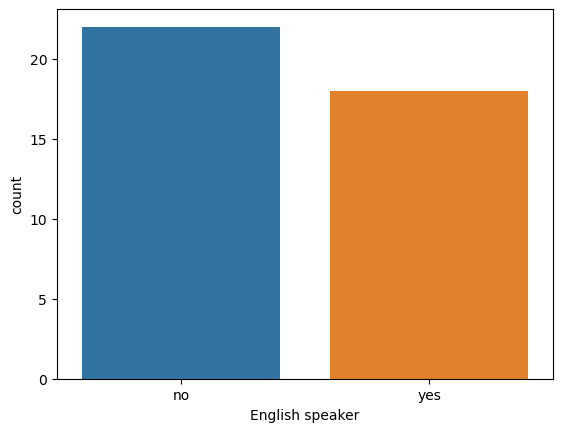

In [15]:
#English speaker distribution of the dataset
sns.countplot(df['English speaker'])

### 2. Calculate the percentage of individuals belonging to different job roles, education levels, genders, and English-speaking groups.


In [16]:
#Calculating percentage of individuals belonging to each job role
df['job'].value_counts(normalize=True) * 100


admin        57.5
manage       30.0
custodial    12.5
Name: job, dtype: float64

In [17]:
#Calculating percentage of individuals belonging to each education level
df['education'].value_counts(normalize=True) * 100

16    17.5
12    17.5
15    15.0
8     15.0
17    10.0
19     7.5
18     7.5
14     5.0
20     2.5
21     2.5
Name: education, dtype: float64

In [18]:
#Calculating the percentage of individuals belonging to each gender group
df['gender'].value_counts(normalize=True) * 100

male      75.0
female    25.0
Name: gender, dtype: float64

In [19]:
# Calculating the percentage of english speakers and non english speakers
df['English speaker'].value_counts(normalize=True) * 100

no     55.0
yes    45.0
Name: English speaker, dtype: float64

# Task 3: Gender and English speaker Analysis

### 1. Calculating the average education level for each gender group (Male, Female, Others).

In [39]:
#Calculating the average education level for each gender group

# Grouping the data by job roles.
grouped_data = df.groupby('gender')

# Calculating the mean (average) education level within each job role group.

# Displaying the result.
average_education = grouped_data['education'].mean().reset_index()
print(average_education)

   gender  education
0  female       13.5
1    male       14.9


### 2. Compare the distribution of job roles among different gender groups using a stacked bar chart.

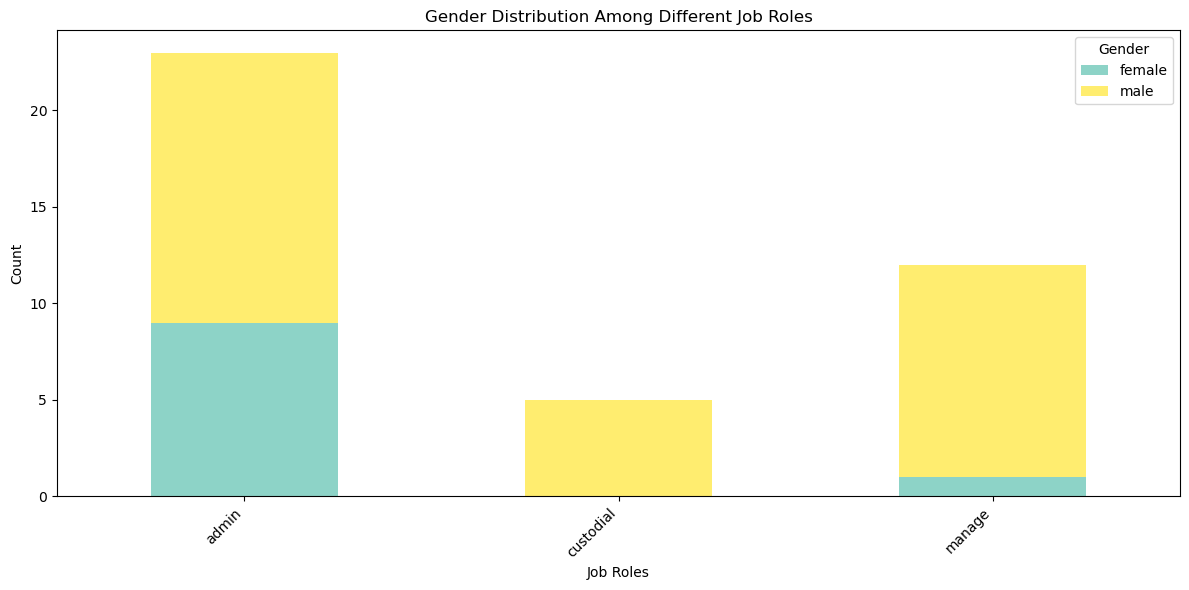

In [37]:
# Step 3: Group the data by job roles and gender
grouped_data = df.groupby(['job', 'gender']).size().unstack(fill_value=0)

# Step 4: Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

# Customize the plot
plt.xlabel('Job Roles')
plt.ylabel('Count')
plt.title('Gender Distribution Among Different Job Roles')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### 3. Creating a histogram to show the distribution of education levels among English speakingand non-English speaking individuals.

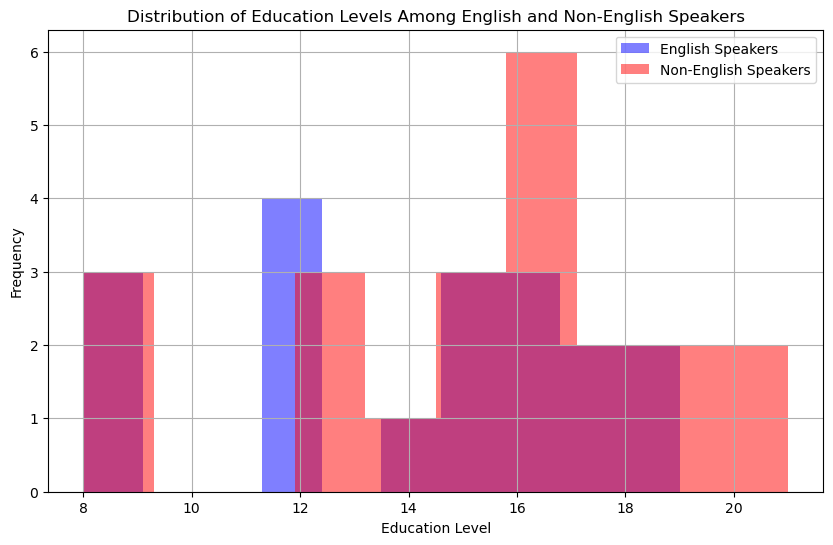

In [36]:
# Creating separate DataFrames for English speakers and non-English speakers
english_speakers = df[df['English speaker'] == 'yes']
non_english_speakers = df[df['English speaker'] == 'no']

# Plotting histograms for education levels
plt.figure(figsize=(10, 6))

# Plotting histogram for English speakers
plt.hist(english_speakers['education'], bins=10, alpha=0.5, color='blue', label='English Speakers')

# Plotting histogram for non-English speakers
plt.hist(non_english_speakers['education'], bins=10, alpha=0.5, color='red', label='Non-English Speakers')

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Distribution of Education Levels Among English and Non-English Speakers')
plt.legend()
plt.grid(True)

# Showing the histogram
plt.show()

# Task 4: Predictive Modeling